# Exploratory Data Analysis

#### Agenda
1. Data Preparation <br>
Structure of the data <br>
Missing Values <br>
2. Feature Engineering<br>
Age of Customers<br>
Income <br>
Months Since Enrollment<br>
Total spending<br>
Number of Children<br>
Education<br>
Marital Status<br>
3. Exploratory Data Analysis - Including statistical tests (T-tests, ANOVA)<br>
Average Spendings: Marital Status Wise<br>
Education Level<br>
Child Status<br>
Average Spendings: Child Status Wise<br>
Age Distribution of Customers<br>
4. Multivariate Data Analysis <br/>
Spending vs Age <br>
Customer seniority vs Spending <br>
Income vs Spending <br>
5. Marketing campaigns effectiveness

### Setting up

In [1]:
# Loading libraries
import pandas as pd 
import numpy as np 
import warnings
import scipy.stats

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
file = "D:\Myy Documents\[DS] All about Python\marketing_campaign.xlsx"
df = pd.read_excel(file)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In this analysis, we'll touch on basic variables only. These are: Birth year, Marital status, Income, Kids in the home, Amount spent on each of the 
<br> The dataset was downloaded from Kaggle <br>
Link to the data: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign <br>
I will quote the description for each variable here for convinient reference: <br>
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
Complain - 1 if customer complained in the last 2 years<br>
DtCustomer - date of customer’s enrolment with the company<br>
Education - customer’s level of education<br>
Marital - customer’s marital status<br>
Kidhome - number of small children in customer’s household<br>
Teenhome - number of teenagers in customer’s household<br>
Income - customer’s yearly household income<br>
MntFishProducts - amount spent on fish products in the last 2 years<br>
MntMeatProducts - amount spent on meat products in the last 2 years<br>
MntFruits - amount spent on fruits products in the last 2 years<br>
MntSweetProducts - amount spent on sweet products in the last 2 years<br>
MntWines - amount spent on wine products in the last 2 years<br>
MntGoldProds - amount spent on gold products in the last 2 years<br>
NumDealsPurchases - number of purchases made with discount<br>
NumCatalogPurchases - number of purchases made using catalogue<br>
NumStorePurchases - number of purchases made directly in stores<br>
NumWebPurchases - number of purchases made through company’s web site<br>
NumWebVisitsMonth - number of visits to company’s web site in the last month<br>
Recency - number of days since the last purchase<br>

### 1. Data Prepapration

#### Structure of the data

In [3]:
df.shape

(2240, 29)

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Many columns are not in the correct dtypes, we will correct them later when needs to.

In [5]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


#### Missing Values

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are incredibly few missing values. Quite a complete dataset. However, we will also have to examine if there are any
inappropriate dtpoints, such as outliers and error values.

Also, since there are few missing values for income, we can simply drop these rows.

In [7]:
df = df.dropna()

### 2. Feature Engineering

There is a lot of information given in the dataset related to the customers. In some cases we can group related columns to create more useful variables. This would help to better explore the data and draw meaningful insights from it.

#### Age

Since most of the activities by customers were between 2012 and 2014, we would assume that the data was collected in January 2015 for the sake of simplicity.

In [8]:
import datetime as dt
df['Age'] = 2015 - df['Year_Birth']
df['Age'].describe()

count    2216.000000
mean       46.179603
std        11.985554
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Age, dtype: float64

The maximum age found is 122, which would not be logical. Since this indicates that there are outliers in the Age column, we will drop these outliers then run the 'describe' command again to check for appropriateness.

In [9]:
df = df[df['Age']<100]

In [10]:
# Next, we will plot the age distribution
# Since we're going to use a lot of distribution diagrams, consider creating a function for it
def hist_with_vline(df, column):
    """This function gets data and column name.
    Plots a histogram with 100 bins, draws a Vline of the column mean and median"""
   
    plt.figure(figsize=(12,6))
    _ = sns.histplot(df[column], bins= 100)
    plt.title('Histogram of ' + column + ' distribution')
    miny, y_lim = plt.ylim()
    plt.text(s = f"Mean  {column} : {df[column].mean():.2f}", x =df[column].mean() * 1.1,  y = y_lim * 0.95, color = 'r')
    _ =plt.axvline(df[column].mean(), color = 'r')
    _ = plt.axvline(df[column].median(), color = 'g')
    plt.text(s = f"Median {column} : {df[column].median():.2f}", x= df[column].median() * 1.1, y= y_lim * 0.90, color = 'g')

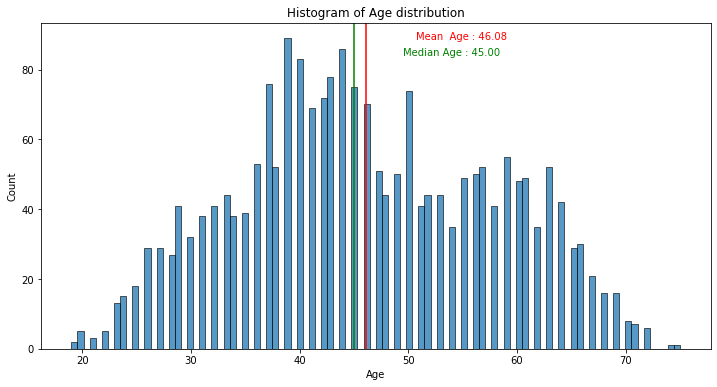

In [11]:
hist_with_vline(df, 'Age')

The distribution is relatively normal, with the mean and median age overlaps quite closely. <br/>
The mean age is 47, which suggests that the customer base includes most middle-aged shoppers.

#### Income

In [12]:
df.Income.describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

Quick examination (through histogram) reveals that there is 1 outlier (Income = 666666). We will drop this value.

In [13]:
df = df[df['Income']<600000]

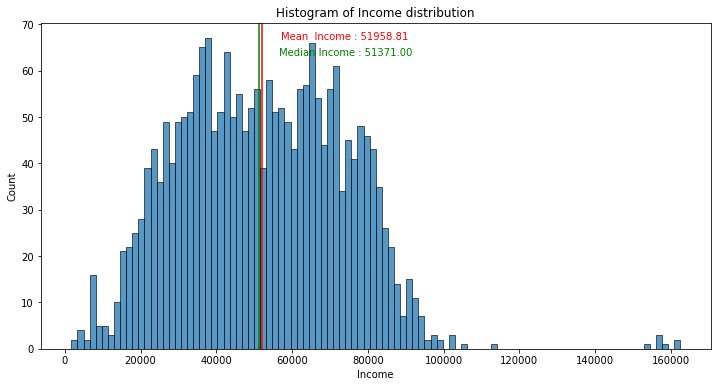

In [14]:
hist_with_vline(df, 'Income')

Both Age and Income are quite normally distributed (with mean and median values somewhat overlaping).

#### Months Since Enrollment

In [15]:
# We will check whether or not our customers stayed with us for long

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['Date_Collected'] = '01-01-2015'
df['Date_Collected'] = pd.to_datetime(df.Date_Collected)
df['Days_Enrolled'] = (df['Date_Collected'] - df['Dt_Customer']).dt.days
df['Months_Enrolled'] = round(df['Days_Enrolled']/30)

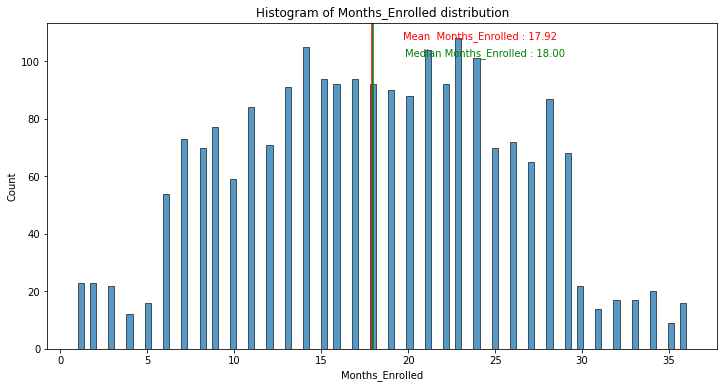

In [16]:
hist_with_vline(df, 'Months_Enrolled')

#### Total items bought

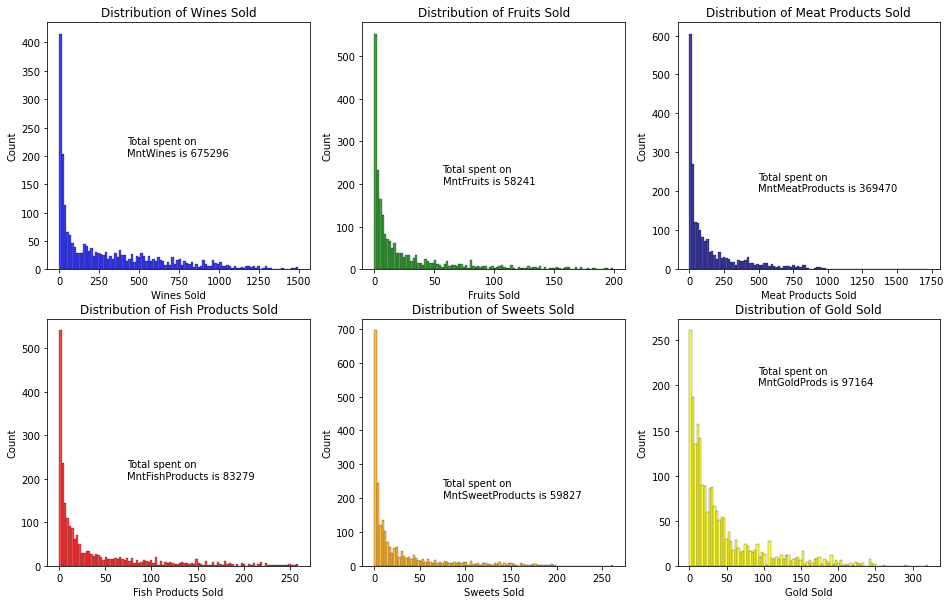

In [17]:
# First, we will examine how many units of each item were sold
columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
titles = ['Wines Sold', 'Fruits Sold', 'Meat Products Sold', 'Fish Products Sold', 'Sweets Sold', 'Gold Sold']
colors = ['blue', 'green', 'darkblue','red','orange','yellow']

fig, ax = plt.subplots(2,3, figsize=(16,10))
for i in range(len(columns)):
    sns.histplot(df[columns[i]], bins= 100, ax = ax[i//3, i%3],color=colors[i])
    ax[i//3, i%3].set_title('Distribution of ' + titles[i])
    ax[i//3, i%3].set_xlabel(titles[i])
    ax[i//3, i%3].text(s = f"Total spent on \n{columns[i]} is {df[columns[i]].sum()} ",
                       x = df[columns[i]].max()/3.5, y = 200)

All products histograms are right skewed, indicating that most customers bought in small amounts, as expected from retail customers.<br>
Generally, we can infer that Wines brought about highest sales value (675k) and Meat producs followed with 364k, while Fruit and Sweet products brought the lowest sales value (58k and 59k respectively). <br/>
A probable conclusion is that, since the shoppers for this online store are mostly middle-aged, it would not be surprising to see Wines and Meat products topping the sales chart and Sweets as the least-bought.

In [18]:
# Total spending - all commodities
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

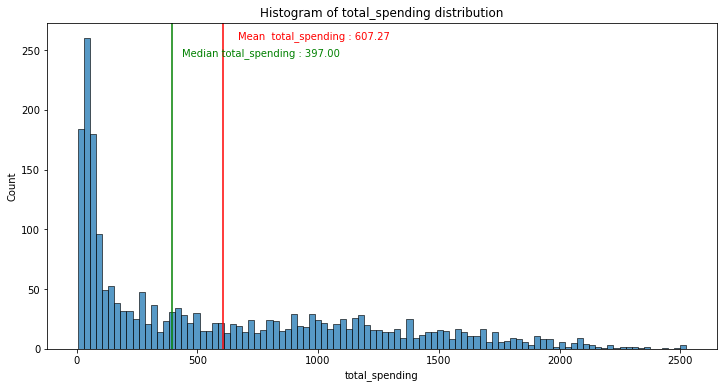

In [19]:
hist_with_vline(df, 'total_spending')

The right skew indicates that most shoppers spent less than the average amount (which is around \$600). However, there were also many people who spent more than \\$1000

#### Children

Next up, we'll examine further into the customers' home.

In [20]:
# The dataset made distinction between the number of small children and teenagers in a household. 
# However, for this analysis we would only need to consider the total number:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [21]:
df.groupby(['Children']).size()

Children
0     632
1    1114
2     416
3      50
dtype: int64

Most households have 1 or no children, and very few have 3 (as little as 2% of all households).

#### Marital status

In [22]:
df.groupby(['Marital_Status']).size()

Marital_Status
Absurd        2
Alone         3
Divorced    231
Married     857
Single      470
Together    571
Widow        76
YOLO          2
dtype: int64

The data provides very granulated infomation about marital status. However, for simplicity we can divide this value into two groups.

In [23]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

In [24]:
df.groupby(['Marital_Status']).size()

Marital_Status
Partner    1428
Single      784
dtype: int64

Two thirds of the customers lived with partners.

### 3. Exploratory Data Analysis 

#### Average spending: Marital Status Wise

In [25]:
maritalspent = df.groupby('Marital_Status')['total_spending'].mean().sort_values(ascending=False)
maritalspent_df = pd.DataFrame(list(maritalspent.items()), columns=['Marital Status', 'Average spending'])
maritalspent_df

,Marital Status,Average spending
0,Single,624.283163
1,Partner,597.926471


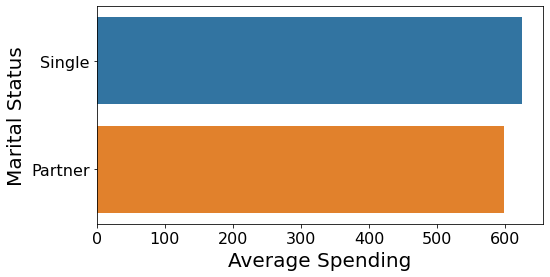

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(data = maritalspent_df, x="Average spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=5)
plt.ylabel('Marital Status', fontsize=20, labelpad=5);

There seems to be little difference between the two amounts. We'll check to see if people living with partners did really spend less, i.e. if the difference holds statistically.

In [27]:
# Create separate columns for testing purpose
singlespent = df[(df['Marital_Status'] == 'Single')].total_spending
partnerspent = df[(df['Marital_Status'] == 'Partner')].total_spending

In [28]:
from scipy import stats
stats.ttest_ind(singlespent, partnerspent)

Ttest_indResult(statistic=0.9841260072963055, pvalue=0.3251612864192599)

Although there is a discrepancy between the two groups, that difference is not statistically significant. There is not enough evidence to conclude that people who lived on their own spent more than ones living with partners.

#### Education Level

In [29]:
df['Education'].value_counts()  

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [30]:
# 2n Cycle also means Master (in Bologna Process), we can treat them similarly
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master') 

In [31]:
eduspent = df.groupby('Education')['total_spending'].mean().sort_values(ascending=False)
eduspent_df = pd.DataFrame(list(eduspent.items()), columns=['Education', 'Average spending'])
eduspent_df

,Education,Average spending
0,PhD,674.283333
1,Graduation,622.188341
2,Master,570.984014
3,Basic,81.796296


PhD-level customers seemed to have purchased the most. We will examine whether the discrepancy among education levels hold statistically.

In [32]:
phdspent = df[(df['Education'] == 'PhD')].total_spending
gradspent = df[(df['Education'] == 'Graduation')].total_spending
msspent = df[(df['Education'] == 'Master')].total_spending
basicspent = df[(df['Education'] == 'Basic')].total_spending

In [33]:
msspent.dtypes

dtype('int64')

In [34]:
# Quick box plots
# Again, we'll be using this type of diagram quite often in this analysis, a function will be time-saving

def box_plot(data, column):
    fig, ax = plt.subplots(figsize=(12, 7))

    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')

    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

    # Set plot title
    ax.set_title('Spending by ' + column)

    # Set species names as labels for the boxplot
    labels = df[column].unique()
    ax.boxplot(data, labels=labels)
    plt.show()

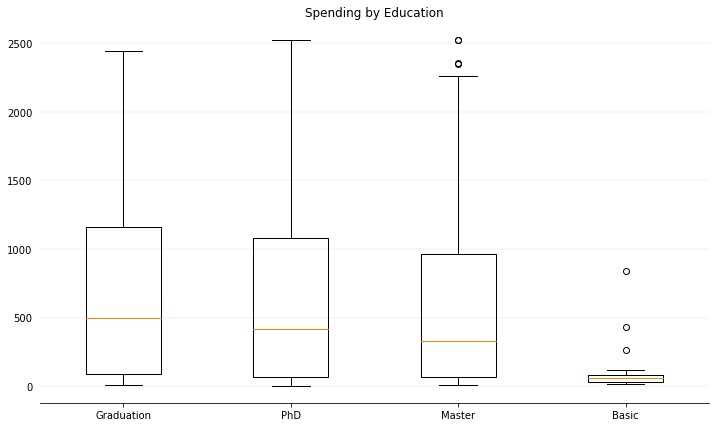

In [35]:
box_plot([phdspent, gradspent, msspent, basicspent], 'Education')

When the population means of only two groups is to be compared, the t-test is used, but when means of more than two groups are to be compared, ANOVA is preferred.

In [36]:
# ANOVA and Tukey hsd test
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
# The test is applied to samples from two or more groups, possibly with differing sizes.

# Check if there was difference in mean values among education lv
from scipy.stats import f_oneway
f_oneway(phdspent, gradspent, msspent, basicspent)

F_onewayResult(statistic=16.937512423605945, pvalue=7.074179349783711e-11)

In [37]:
# There is enough evidence that the average purchase differs among education level so we will carry out turkey hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df['total_spending'], ## values to compare
                          groups = df['Education'], ## how values are grouped, here by lv of Education
                          alpha=0.05) ## lv of significance
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
     Basic Graduation  540.392  0.001  326.8446 753.9395   True
     Basic     Master 489.1877  0.001  270.8579 707.5175   True
     Basic        PhD  592.487  0.001  372.5114 812.4627   True
Graduation     Master -51.2043 0.3449 -130.4409  28.0323  False
Graduation        PhD   52.095 0.3793    -31.57   135.76  False
    Master        PhD 103.2993 0.0273    8.0879 198.5107   True
---------------------------------------------------------------


We can conclude with confidence that the disparities in expenditure were significant between Basic and each of the other three and between Master and PhD customers.
Meanwhile, there was no signigicant difference in the amount spent by Grad vs Master and PhD.

#### Average Spending: Child Status Wise

In [38]:
nospent = df[(df['Children'] == 0)].total_spending
onespent = df[(df['Children'] == 1)].total_spending
twospent = df[(df['Children'] == 2)].total_spending
threespent = df[(df['Children'] == 3)].total_spending

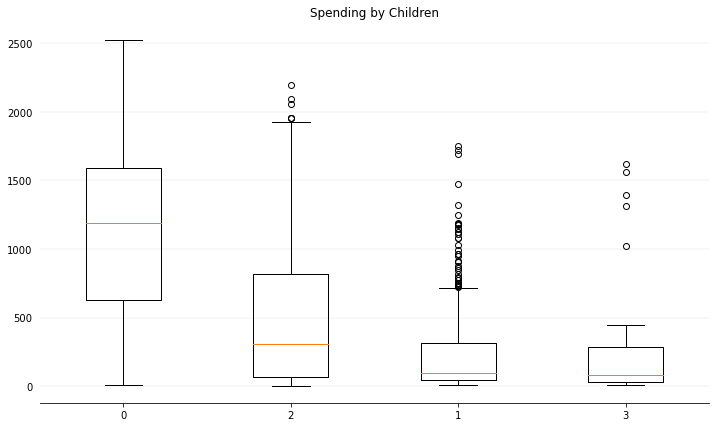

In [39]:
box_plot([nospent, onespent, twospent, threespent], 'Children')

Testing:

In [40]:
f_oneway(nospent, onespent, twospent, threespent)

F_onewayResult(statistic=305.58593025371937, pvalue=6.397201638039218e-166)

In [41]:
tukey = pairwise_tukeyhsd(endog = df['total_spending'], 
                          groups = df['Children'], 
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 -628.2202  0.001  -693.1097 -563.3307   True
     0      2 -857.3293  0.001  -939.5969 -775.0617   True
     0      3 -848.5649  0.001 -1039.9914 -657.1384   True
     1      2 -229.1091  0.001  -303.9795 -154.2388   True
     1      3 -220.3447 0.0142  -408.7106  -31.9788   True
     2      3    8.7644    0.9  -186.2716  203.8004  False
----------------------------------------------------------


Households with different number of children (1 exception, however) spent different amounts. Specifically, households with no children spent the highest on average.

### 4 - Multivariate Data Analysis

#### Spending vs Age (Scatterplot)

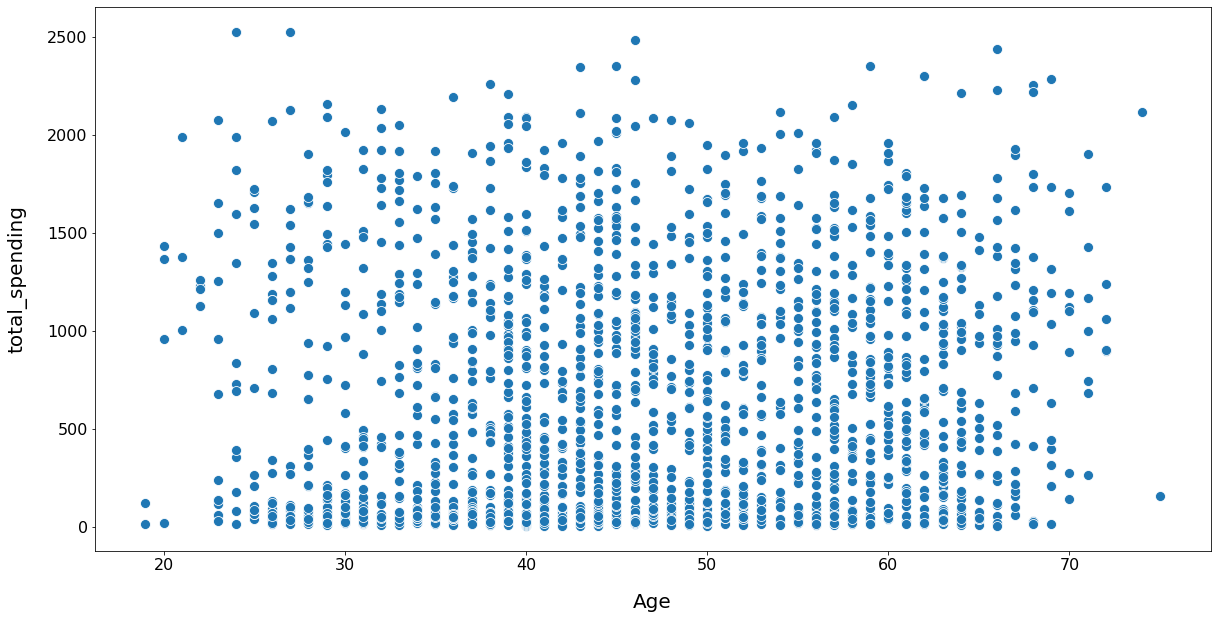

In [42]:
def scatter(x_axis,y_axis):
    plt.figure(figsize=(20,10))


    sns.scatterplot(x=df[x_axis], y=df[y_axis], s=100);

    plt.xticks( fontsize=16)
    plt.yticks( fontsize=16)
    plt.xlabel(x_axis, fontsize=20, labelpad=20)
    plt.ylabel(y_axis, fontsize=20, labelpad=20)
    
scatter('Age', 'total_spending')

All is noise, it seems that there is no relationship between customers' age and their purchasing behavior.

What about customers' seniority with the platform?

#### Customer seniority and Spending

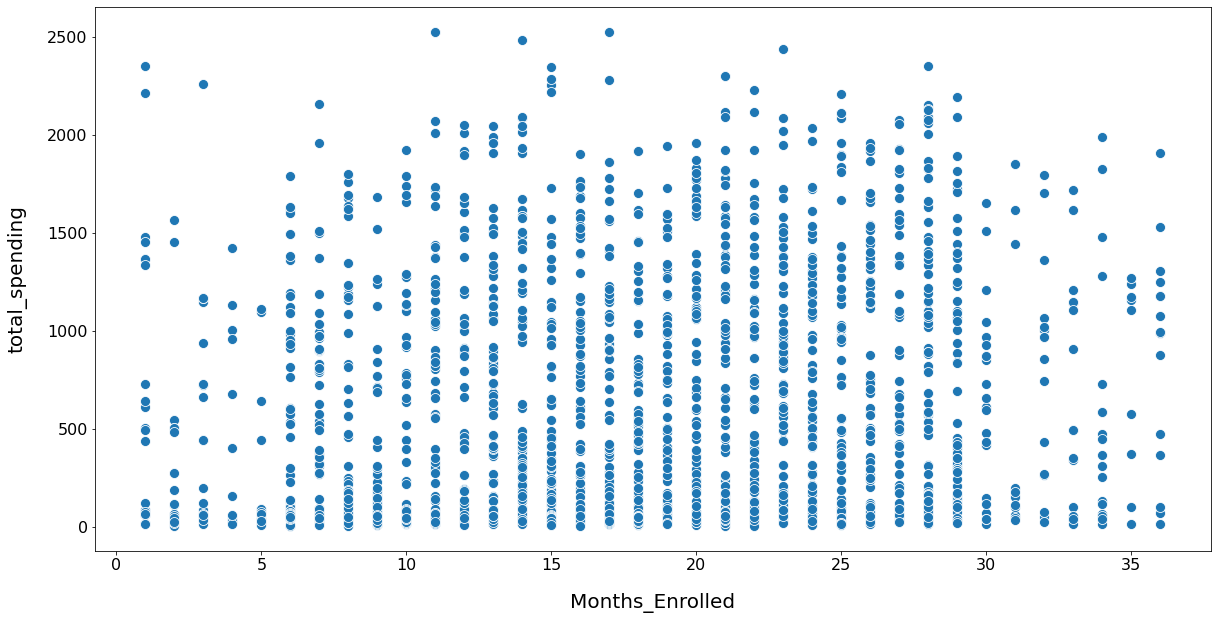

In [43]:
scatter('Months_Enrolled','total_spending')

Again, there is no particular pattern.

#### Spending vs Income

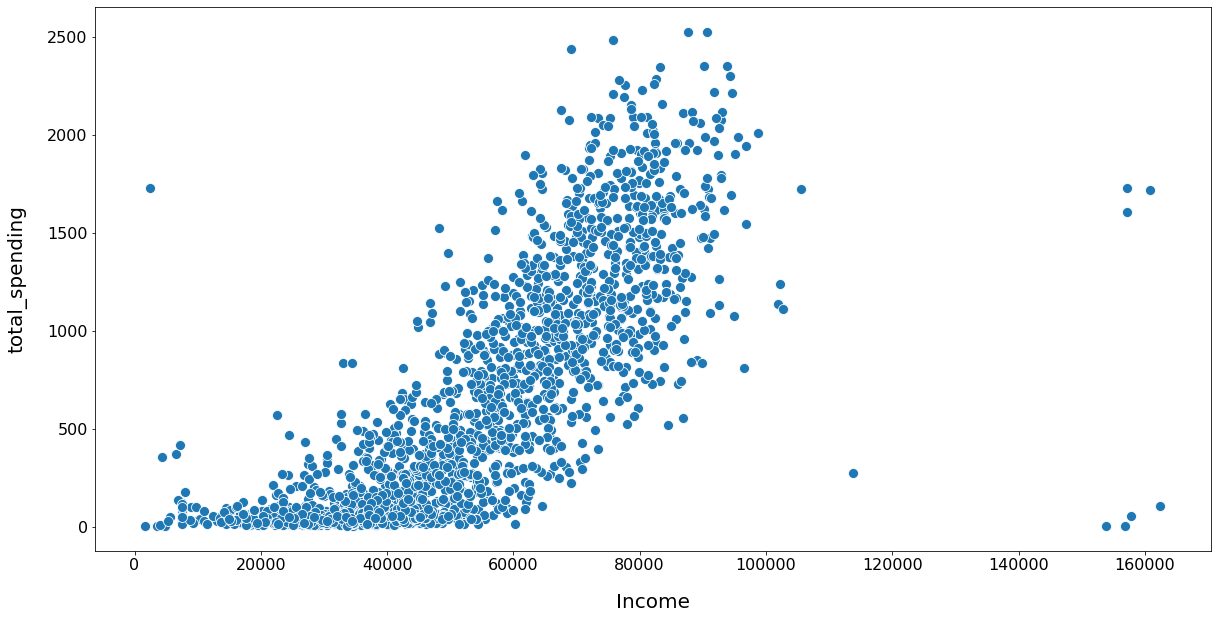

In [46]:
scatter('Income','total_spending')

A clear exponential relationship is present. 

### 5. Marketing Capaign Effectiveness

First, we will compare the number of people accepting offer in each campaign to see if any of the campaigns outperformed the others.

Since the response was recorded as 1 or 0, we can quickly determine the total number by simple summing.

In [47]:
accepted = df[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum()
print(accepted)

AcceptedCmp1    142
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    161
dtype: int64


Except that the second campaign attracted as few as 30 people, the remaining campaigns attracted similar number of shoppers.

Suppose we hypthesize that people who accepted more offers would have spent more (or the other way around, people who spent a lot were more prone to accept offers). Let's check if this hypothesis is true.

In [48]:
df['Total_accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis = 1, skipna = True)
print(df.Total_accepted)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Total_accepted, Length: 2212, dtype: int64


In [49]:
df.groupby(['Total_accepted']).size()

Total_accepted
0    1754
1     322
2      81
3      44
4      11
dtype: int64

In [50]:
acceptspent = df.groupby('Total_accepted')['total_spending'].mean().sort_values(ascending=False)
acceptspent_df = pd.DataFrame(list(acceptspent.items()), columns=['Total offers accepted', 'Average spending'])
acceptspent_df

,Total offers accepted,Average spending
0,3,1705.636364
1,4,1501.636364
2,2,1409.938272
3,1,914.279503
4,0,480.677309


In [51]:
no_accept = df[(df['Total_accepted'] == 0)].total_spending
one_accept = df[(df['Total_accepted'] == 1)].total_spending
two_accept = df[(df['Total_accepted'] == 2)].total_spending
three_accept = df[(df['Total_accepted'] == 3)].total_spending
four_accept = df[(df['Total_accepted'] == 4)].total_spending

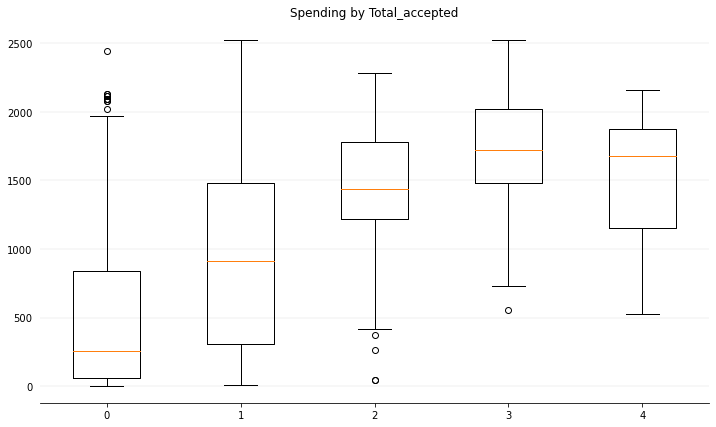

In [52]:
box_plot([no_accept, one_accept, two_accept, three_accept, four_accept], 'Total_accepted')

In [53]:
f_oneway(no_accept, one_accept, two_accept, three_accept, four_accept)

F_onewayResult(statistic=151.06961516668767, pvalue=2.4968482327293266e-114)

From the results above, we can conclude that either the offers induced the customers to buy more, thus spent more; or the customers who spent a lot were more willing to take advantage of offers in marketing campaigns. <br>
Since the direction of the causation is unclear, we cannot conclude decisively about the effectiveness of using offers in marketing campaign.